<a href="https://colab.research.google.com/github/jopverhagen/learn_neuralnetworks/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

def softplus(x):
  return np.log(1+(np.exp(x)))


def softplus_deriv(x):
  return 1/(1+(np.exp(-x)))

#initialize training data
inputs = np.array([0,
                   0.5,
                   1])

observed = np.array([0,
               1,
               0
               ])

def plotg(inputs,observed,testinput,predicted,y1node,y2node):
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.grid(alpha=.8,linestyle='--')
    ax.scatter(inputs, observed,lw=20)
    ax.plot(testinput, predicted ,lw=5, color='green', label='predicted')
    ax.plot(testinput, y1node ,lw=0.5, color='blue', label='Y1 node')
    ax.plot(testinput, y2node ,lw=0.5, color='orange', label='Y2 node')
    ax.legend()

,X,Y,Y1node,Y2node,Predicted,Efficacy
,0.0,0,0.214554,1.018222,0.006335,False
,0.5,1,0.820330,0.264442,1.000981,True
,1.0,0,2.048091,0.050521,-0.004870,False


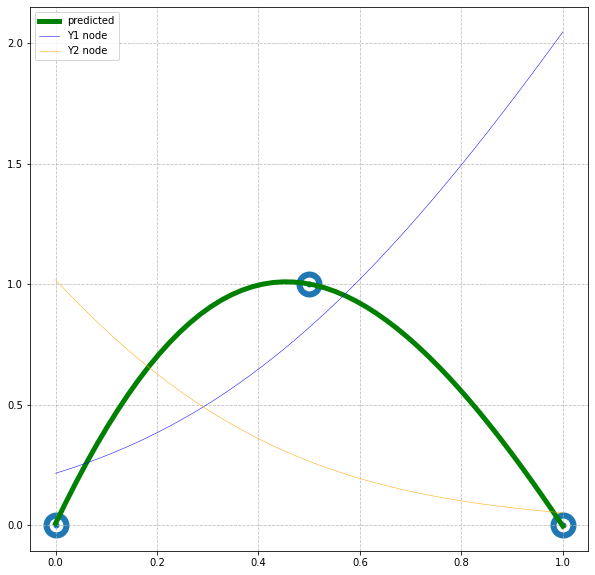

In [ ]:
#Y1 node
w1 = 3.34
b1 = -1.43

#Y2 node
w2 = -3.53
b2 = 0.57

#Output node
w3 = -1.22
w4 = -2.30
b3 = 2.61

# forward propagation
def forwardprop(x):
    y1 = softplus(x * w1 + b1)
    y2 = softplus(x * w2 + b2)
    predicted = (y1 * w3) + (y2 * w4) + b3
    return predicted,y1,y2 


# plot neural network 50 with inputs
testinputs = np.linspace(0, 1, num=50)
predicted,y1,y2 = forwardprop(testinputs)
plotg(inputs,observed,testinputs,predicted,y1,y2)

# observed vs predicted dataset
predicted_dataset,y1,y2 = forwardprop(inputs)
efficacy = np.round(predicted_dataset).astype(bool)
data = {'X':inputs,'Y':observed,'Y1node':y1,'Y2node':y2,'Predicted':predicted_dataset, 'Efficacy':efficacy} 
df = pd.DataFrame(data)
blankIndex=[''] * len(df)
df.index=blankIndex
display(df)



squared error start:20.423597677589218
squared error end:0.00011763429519510858
new b3:2.6074747747915756


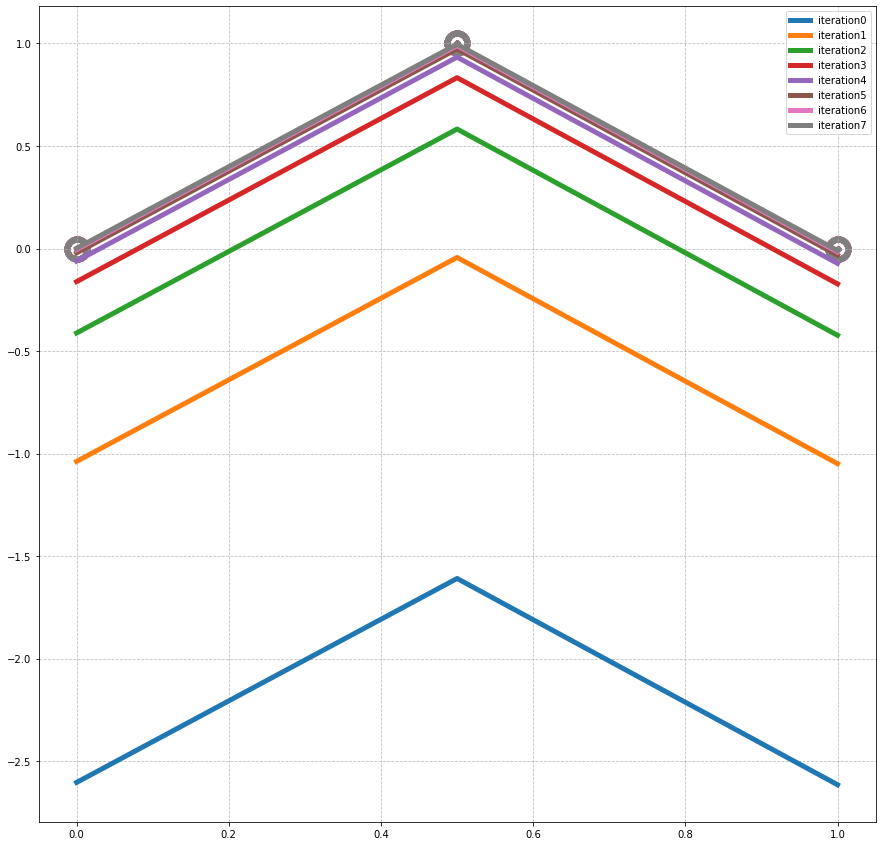

In [ ]:
# forward propagation
def forwardprop(inputs,w1,w2,b1,b2,w3,w4,b3):
    y1 = softplus(inputs * w1 + b1)
    y2 = softplus(inputs * w2 + b2)
    predicted = (y1 * w3) + (y2 * w4) + b3
    return predicted

learning_rate = 0.1

w1 = 3.34
b1 = -1.43

#Y2 node
w2 = -3.53
b2 = 0.57

#Output node
w3 = -1.22
w4 = -2.30
b3 = 0 #set b3 to zero and only backprop b3

predicted = forwardprop(inputs,w1,w2,b1,b2,w3,w4,b3)
ssr = np.sum((observed - predicted)**2) #sum of squared residuals
print("squared error start:"+ str(ssr))

fig, ax = plt.subplots(figsize=(15, 15))

for i in range(8):
    predicted = forwardprop(inputs,w1,w2,b1,b2,w3,w4,b3)
   
    plt.grid(alpha=.8,linestyle='--')
    ax.scatter(inputs, observed,lw=20)
    ax.plot(inputs, predicted ,lw=5, label='iteration' + str(i))
    ax.legend()

    ssr = np.sum((observed - predicted)**2) 
    slope = np.sum(-2 *(observed - predicted) * 1) #derivative sum of squared residuals / b3
    b3 -= learning_rate * slope

print("squared error end:"+ str(ssr))
print("new b3:" + str(b3))